# Ad Campaign Hypothesis Testing

by Zachary Greenberg

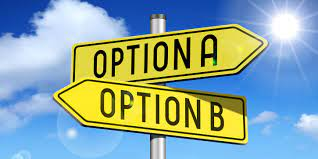

# Overview

***Disclaimer: The data / situation presented in this repository is not real. It has been 100% randomly generated using the Python library, Faker***  

In sales, advertising is an important part in a companies effort to create awareness of products and increase revenue. With the help of Data Science, companies and their advertising departments can assess the effectiveness of their ads as long as there is something to compare them to. For this pretend company below, they have chosen to deploy 2 different advertisments right around the end of September to mid November, aiming to show ads for upcoming holiday sales. Using hypothesis testing, I will investigate the performance of the two ads. 

# Business Understanding

Advertising plays a key role in companies success and revenue. The question is, how would we go about measuring its success? Comparing the effects of two different ads will give companies more of an understanding and allow them to get some sort of tangible measure of effectiveness of the specific ads.

# Data Understanding

The dataset has been randomly generated using the Python library, Faker. ***In the data file, the code generating the data has random seeds set in place to ensure reproducibility.***  

The following columns were created:  

*campaign_start* - the start date/time of the campaign  
*campaign_end* - the end date/time of the campaign  
*ad_version* - the version of the ad shown  
*age* - the age of the person shown the ad   
*sex* - the sex of the person  
*state* - the state in which the person lives  
*clicked_on_ad* - whether or not the person clicked on the ad  
*amount_spent* - how much the person spent IF they clicked on the ad  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/ad_data.csv')

In [3]:
df.head()

,campaign_start,campaign_end,ad_version,age,sex,state,clicked_on_ad,amount_spent
0,2019-10-24 00:54:53,2019-12-10 19:54:30,B,29,M,North Dakota,True,8.54
1,2019-10-14 01:24:06,2019-12-10 03:35:27,B,44,M,Wyoming,True,86.92
2,2019-10-26 16:28:55,2019-12-10 10:49:22,B,73,M,Arizona,False,0.00
3,2019-10-17 23:31:46,2019-12-14 01:32:07,A,33,F,Minnesota,True,4.00
4,2019-10-07 22:08:29,2019-12-14 19:02:02,A,28,F,Colorado,False,0.00


In [4]:
df.shape

(500, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   campaign_start  500 non-null    object 
 1   campaign_end    500 non-null    object 
 2   ad_version      500 non-null    object 
 3   age             500 non-null    int64  
 4   sex             500 non-null    object 
 5   state           500 non-null    object 
 6   clicked_on_ad   500 non-null    bool   
 7   amount_spent    500 non-null    float64
dtypes: bool(1), float64(1), int64(1), object(5)
memory usage: 28.0+ KB


In [6]:
df['campaign_start'] = pd.to_datetime(df['campaign_start'])
df['campaign_end'] = pd.to_datetime(df['campaign_end'])

In [7]:
df['ad_version'] = np.where(df['ad_version'] == 'A', 0, 1)
df['clicked_on_ad'] = np.where(df['clicked_on_ad'] == True, 1, 0)

In [8]:
df.describe()

,ad_version,age,clicked_on_ad,amount_spent
count,500.000000,500.000000,500.000000,500.000000
mean,0.516000,52.414000,0.496000,47.809360
std,0.500244,20.227826,0.500485,63.582162
min,0.000000,18.000000,0.000000,0.000000
25%,0.000000,35.000000,0.000000,0.000000
50%,1.000000,53.000000,0.000000,0.000000
75%,1.000000,71.000000,1.000000,87.850000
max,1.000000,85.000000,1.000000,198.900000


The average of the ad_version in this data set is around .5. This tells us there is a fairly even distribution of groups in the dataset. I am going to change ad_version and clicked_on_ad back to their original datatypes for easier understanding of the analysis.

In [9]:
df['ad_version'] = np.where(df['ad_version'] == 0, 'A', 'B')
df['clicked_on_ad'] = np.where(df['clicked_on_ad'] == 1, True, False)

In [10]:
df['sex'].value_counts()

F    263
M    237
Name: sex, dtype: int64

There are slightly more females represented in this dataset. 

In [11]:
df.groupby(df['ad_version'])['sex'].value_counts()

ad_version  sex
A           M      127
            F      115
B           F      148
            M      110
Name: sex, dtype: int64

It is interesting the results above, because when looking at the value counts of sex by ad version, more males were shown version A.

In [12]:
df['ad_version'].value_counts()

B    258
A    242
Name: ad_version, dtype: int64

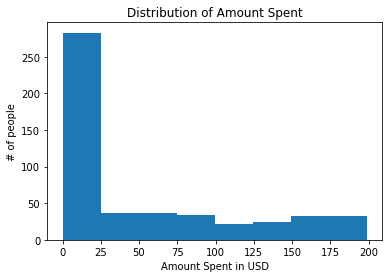

In [13]:
fig, ax = plt.subplots()
ax.hist(x = df['amount_spent'], bins = 8) #I would like to see this in increments of $25
ax.set_xlabel('Amount Spent in USD')
ax.set_ylabel('# of people')
ax.set_title('Distribution of Amount Spent')
plt.show()

The distribution above shows a strongly positive skew for the amount spent on both ads.

In [14]:
df.groupby(df['ad_version'])['amount_spent'].sum()

ad_version
A    11868.15
B    12036.53
Name: amount_spent, dtype: float64

As we can see from above, version B proved to bring in more money. 

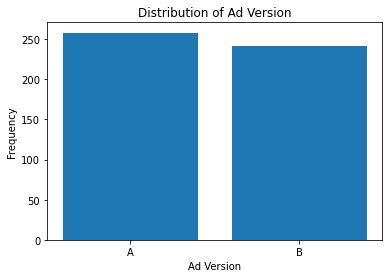

In [15]:
fig, ax = plt.subplots()
ax.bar(x=['A', 'B'], height = df.ad_version.value_counts())
ax.set_xlabel('Ad Version')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Ad Version')
plt.show()

In [16]:
df.groupby(by=df['ad_version'])['clicked_on_ad'].value_counts()

ad_version  clicked_on_ad
A           True             123
            False            119
B           False            133
            True             125
Name: clicked_on_ad, dtype: int64

Although the results are close to one another, it seems as though more people ended up clicking on Version B.

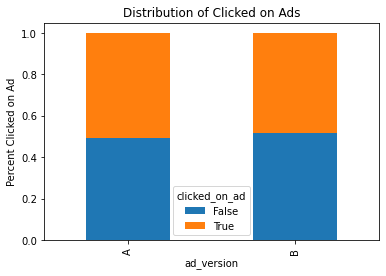

In [17]:
fig, ax = plt.subplots()
df.groupby(df['ad_version'])['clicked_on_ad'].value_counts(normalize = True).unstack().plot(kind='bar', stacked = True, ax = ax)
ax.set_ylabel('Percent Clicked on Ad')
ax.set_title('Distribution of Clicked on Ads')
plt.show();

The distribution of the clicks for the ads is also approximately equal. There seems to be a slightly higher percentage of successful clicks on ad version A. 